In [398]:
import pandas as pd
import numpy as np
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
#from catboost import CatBoostRegressor
import lightgbm as lgb
from math import sqrt
from sklearn.model_selection import KFold
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

plt.rcParams['figure.figsize'] = [16, 10]

In [399]:
df = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

df.head(1)

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.2075,16.773757,0.933841,0.000846,0.00549,0.000676,0.0,0.001372,...,0.002848,0.007537,0.0,0.012928,0,0,ZA4161001,-29.68227,24.734743,0.292039


In [400]:
df['houdivind']=df['total_households']/df['total_individuals']*100
df_test['houdivind']=df_test['total_households']/df_test['total_individuals']*100
df_full=pd.concat([df,df_test])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


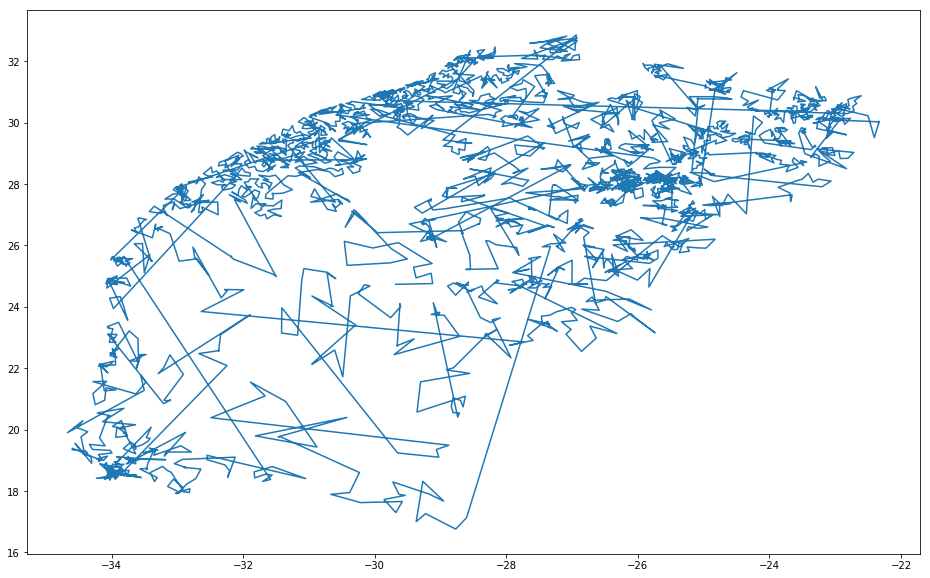

In [401]:
x1=df_full['lon']
x2=df_full['lat']
plt.plot(x2,x1)

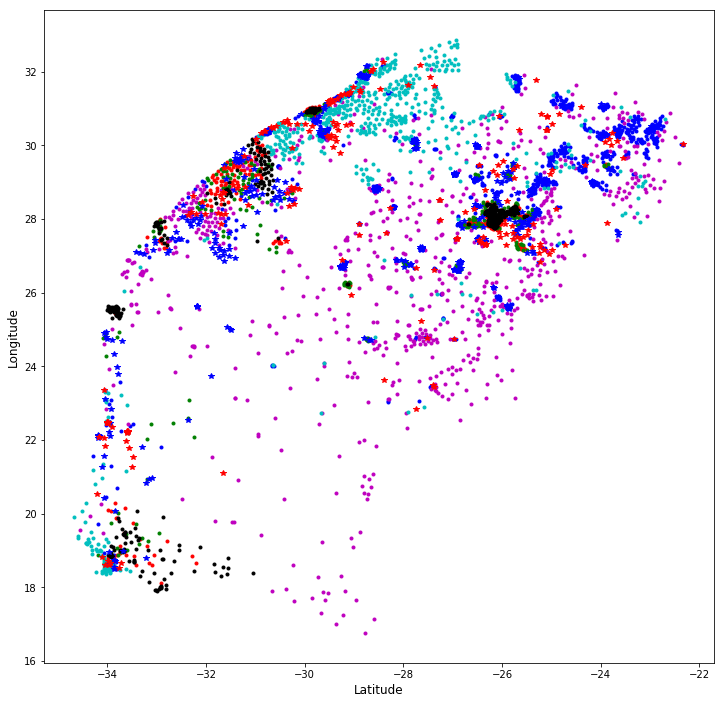

In [402]:
from sklearn.cluster import  KMeans
#plot result
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^','r*']);
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
for i in range(id_n):
    cluster=np.where(id_label==i)[0]
    plt.plot(x2[cluster].values,x1[cluster].values,ptsymb[i])
plt.show()

In [403]:
# Variable with the Longitude and Latitude
X=df_full.loc[:,['lat','lon']]
X.head(10)

,lat,lon
0,-29.682270,24.734743
1,-29.119311,24.757737
2,-29.142276,25.094093
3,-29.372052,24.942867
4,-29.409381,25.290165
5,-29.126870,25.410360
6,-29.640860,26.091774
7,-30.029163,25.917164
8,-30.462176,26.133170
9,-30.420421,25.351630


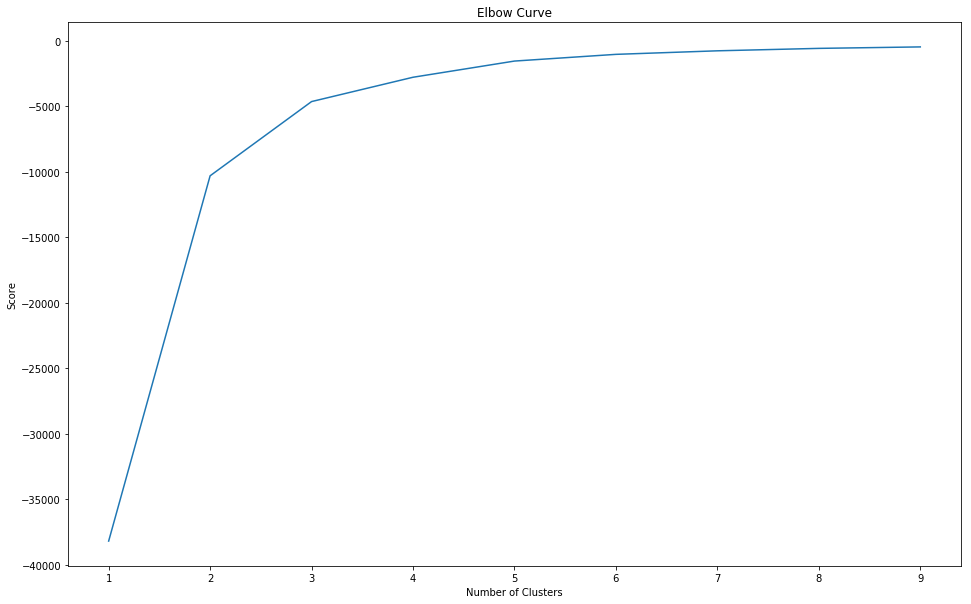

In [404]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_full[['lat']]
X_axis = df_full[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [405]:
kmeans = KMeans(n_clusters = 3, init ='k-means++', max_iter=5000)
kmeans.fit(X[X.columns[0:2]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[0:2]]) # Labels of each point
print(labels)


[2 2 2 ... 1 1 1]


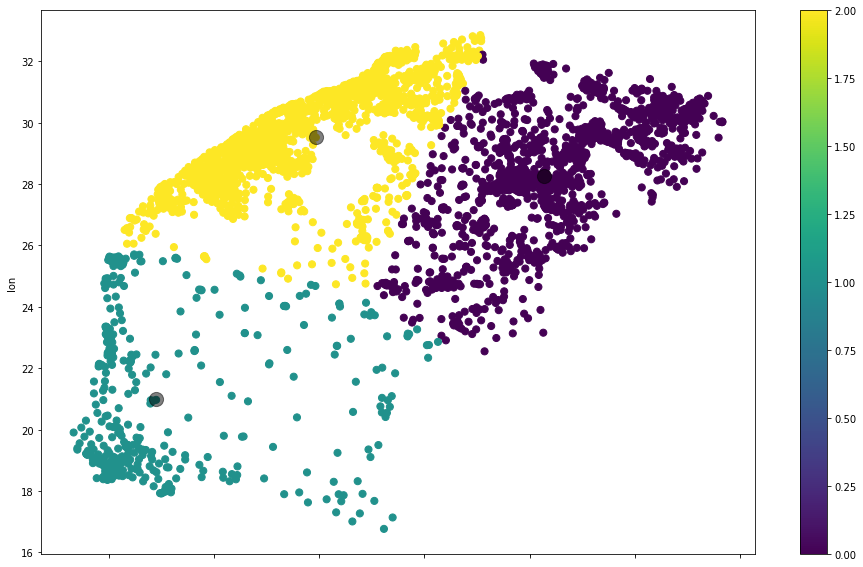

In [406]:
X.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
#print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [407]:
X

,lat,lon,cluster_label
0,-29.682270,24.734743,2
1,-29.119311,24.757737,2
2,-29.142276,25.094093,2
3,-29.372052,24.942867,2
4,-29.409381,25.290165,2
...,...,...,...
1008,-33.806524,18.496094,1
1009,-33.982120,18.673308,1
1010,-34.062704,18.767457,1
1011,-34.057772,18.487893,1


In [422]:
#df_full['cluster']=X['cluster_label']
df_full.to_csv("kmean_data")

In [409]:
train_new=df_full.iloc[0:len(df),]

In [410]:
len(train_new)

2822

In [411]:
test_new=df_full.iloc[len(df):,]
len(test_new)

1013

In [412]:
X = train_new[['lln_00', 'lan_06', 'psa_04', 'lan_03', 'lan_07', 'psa_01',
       'lan_09', 'dw_01', 'lan_05', 'NL', 'lln_01', 'pg_00', 'lan_11',
       'lan_10', 'car_00', 'car_01', 'pw_00', 'psa_00','houdivind','cluster']]

y= train_new["target"]

Xtest= test_new[['lln_00', 'lan_06', 'psa_04', 'lan_03', 'lan_07', 'psa_01',
       'lan_09', 'dw_01', 'lan_05', 'NL', 'lln_01', 'pg_00', 'lan_11',
       'lan_10', 'car_00', 'car_01', 'pw_00', 'psa_00','houdivind','cluster']]

In [413]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)

In [414]:
rf = RandomForestRegressor(n_estimators=500, min_samples_split=2, max_features= 5,
                           min_samples_leaf=2,max_depth=110, bootstrap= False)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [415]:
predictions= rf.predict(X_test)
print("RMSE:", sqrt(mean_squared_error(y_test, predictions)))

RMSE: 3.302864561957394


In [416]:
df_test["new_preds"]=rf.predict(Xtest)

In [417]:
df_test[['ward',"new_preds"]].to_csv('new_predictions.csv', index=False)

In [418]:
df_test[['ward', "new_preds"]]

,ward,new_preds
0,21001001: Ward 1,18.113399
1,21001002: Ward 2,15.096578
2,21001003: Ward 3,22.042234
3,21001004: Ward 4,16.906598
4,21001005: Ward 5,20.653445
...,...,...
1008,19100107: Ward 107,7.045647
1009,19100108: Ward 108,22.333318
1010,19100109: Ward 109,17.775088
1011,19100110: Ward 110,12.970229


In [419]:
liearR=LinearRegression()
liearR.fit(X_train,y_train)
predict=liearR.predict(X_test)
print("RMSE:", sqrt(mean_squared_error(y_test, predict)))

RMSE: 4.022303406585325


## XGBOOST REGRESSOR MODEL

In [420]:
model_xgb = XGBRegressor(n_estimators=300,learning_rate=0.05, min_child_weight=2,max_depth=15,
                         eta =0.6, reg_lambda = 1.2)

model_xgb.fit(X_train, y_train)
sqrt(mean_squared_error(y_test, model_xgb.predict(X_test)))

/home/aims/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:32:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3.38921048710595

### Best parameters

{'colsample_bytree': 0.8, 'max_depth': 20, 'n_estimators': 1000, 'reg_alpha': 1.3, 'reg_lambda': 1.3, 'subsample': 0.7}


## Parameter tunning for xgboost

In [234]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     StratifiedKFold)

In [235]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=3, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        
         pred = fitted_model.predict_proba(X_test_data)
    else:
          pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [236]:
# model = XGBRegressor()
# param_grid = {
#     'n_estimators': [400, 700, 1000],
#     'colsample_bytree': [0.7, 0.8],
#     'max_depth': [15,20,25],
#     'reg_alpha': [1.1, 1.2, 1.3],
#     'reg_lambda': [1.1, 1.2, 1.3],
#     'subsample': [0.7, 0.8, 0.9]
# }

# model, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, model, 
#                                  param_grid, cv=5)

# print(np.sqrt(-model.best_score_))
# print(model.best_params_)

## Combined xgboost and random forest

In [241]:
avg_pre = (model_xgb.predict(X_test) + rf.predict(X_test))/2

sqrt(mean_squared_error(y_test, avg_pre))

3.2508469694226525

## CATBOOST

In [107]:
# model_cat=CatBoostRegressor(iterations=1000, depth=3, learning_rate=0.01, loss_function='RMSE')
# model_cat.fit(X_train, y_train)
# sqrt(mean_squared_error(y_test, model_cat.predict(X_test)))

## Save in csv 

In [108]:
def create_submission(data, fname, cols, models=[]):
    score = 0
    for model in models:
        score += model.predict(data[cols])
    data['target'] = (score / len(models))
    submissions = data[['ward', 'target']]
    submissions.to_csv(fname, index=False)
    return submissions

In [109]:
top_cols_20 = ['lln_00', 'lan_06', 'psa_04', 'lat', 'lan_03', 'lan_07', 'psa_01',
       'lan_09', 'dw_01', 'lan_05', 'NL', 'lln_01', 'pg_00', 'lan_11', 'lon',
       'lan_10', 'car_00', 'car_01', 'pw_00', 'psa_00','houdivind']

In [110]:
create_submission(df_test, 'randomf3_xgboost.csv', cols=top_cols_20, models=[rf, model_xgb])

,ward,target
0,21001001: Ward 1,17.985891
1,21001002: Ward 2,15.228503
2,21001003: Ward 3,20.999580
3,21001004: Ward 4,16.848363
4,21001005: Ward 5,21.812550
...,...,...
1008,19100107: Ward 107,6.564926
1009,19100108: Ward 108,21.121762
1010,19100109: Ward 109,17.185115
1011,19100110: Ward 110,12.980439


0


array([-26.2862236])

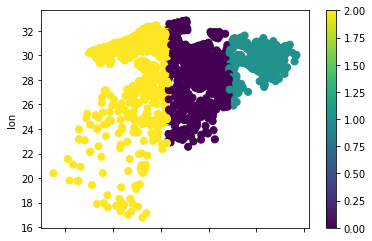

In [47]:
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [48]:
X

,lat,lon,cluster_label
0,-29.682270,24.734743,2
1,-29.119311,24.757737,2
2,-29.142276,25.094093,2
3,-29.372052,24.942867,2
4,-29.409381,25.290165,2
...,...,...,...
2817,-27.675590,23.057920,0
2818,-27.591408,22.907161,0
2819,-27.952550,22.749698,2
2820,-27.913875,22.755314,2
